In [10]:
import pymc3 as pm
from scipy.stats import norm
import numpy as np
from time import time
import pandas as pd

np.random.seed(2022)

n = 640
n_shapes = 8

D2 = [1,10,20,40,80,160,320,640]
D3 = 10
D1 = [640,64,32,16,8,4,2,1]
obs_data_list = []

data = np.zeros((n,1,D3))

for i in range(n):
    m = (np.random.random()-0.5)*20
    data_i = norm(m,1).rvs(D3)
    data[i] = data_i

dataShapes = []

for d1,d2 in zip(D1,D2):
    dataShapes.append(data.reshape((d1,d2,D3)))

obs_data = dataShapes[1]

In [23]:
with pm.Model() as model:
    data = pm.Data("obs", obs_data[0])
    mus = pm.Normal("μ",0,20,shape=10)
    sig = pm.Constant("σ",1)
    normals = [pm.Normal(f"obs_{i}",mu = mus[i],sigma=sig,observed=data.get_value()[i]) for i in range(10)]

In [24]:
with model as model:
    vis = pm.model_to_graphviz()

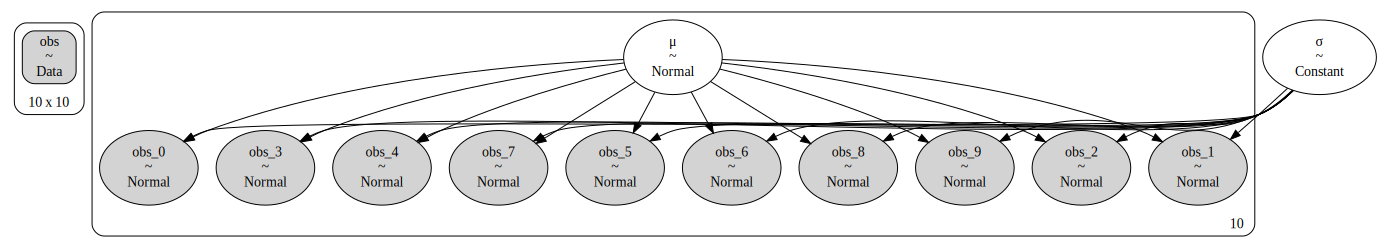

In [25]:
vis